# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

---

# (실습준비) 데이터 불러오기부터

In [81]:
import pandas as pd
import numpy as np

# 학습/평가 데이터 로딩
train_x = pd.read_csv("C:/Users/swjdg/kt_kaggle/train_x.csv", index_col=0)
train_y = pd.read_csv("C:/Users/swjdg/kt_kaggle/train_y.csv",index_col=0)
test_x = pd.read_csv("C:/Users/swjdg/kt_kaggle/test_x.csv",index_col=0)
test_y = pd.read_csv("C:/Users/swjdg/kt_kaggle/data2022.csv")

In [82]:
train_x

,시간대구분,year,month,day,dayofweek,Holiday,Holid,7d,1m,2m,2m1d,2m7d,4m
2832,0,2017,4,29,5,1,0,41962.3066,44163.8524,42753.6551,43562.4131,43203.0374,43922.2281
2833,1,2017,4,29,5,1,0,42014.1641,44619.3828,42903.9443,43796.3046,43887.1416,43763.4929
2834,2,2017,4,29,5,1,0,42095.7143,44693.5469,43253.2915,43761.4846,44229.8310,43561.5708
2835,3,2017,4,29,5,1,0,42124.9072,44877.4877,43554.8642,44003.9704,44504.3978,43928.9929
2836,4,2017,4,29,5,1,0,42239.2727,44803.4923,44111.1352,44330.8649,44810.7650,44150.2973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,19,2021,12,31,4,0,0,35837.1203,36555.8859,35708.4819,36087.9937,35815.6482,36948.3439
43820,20,2021,12,31,4,0,0,35867.0404,36086.8787,35924.7026,36339.3987,36009.3918,36599.8404
43821,21,2021,12,31,4,0,0,36299.9836,36450.9247,36597.7205,36527.5722,36339.1032,36754.5732
43822,22,2021,12,31,4,0,0,36409.8234,37072.4159,37163.4665,36940.6312,37097.1192,36751.0401


In [83]:
test_x

,시간대구분,year,month,day,dayofweek,Holiday,Holid,7d,1m,2m,2m1d,2m7d,4m
42312,0,2022,1,1,5,1,0,39189.4199,40777.8185,40626.2446,40355.9941,40506.8966,41180.8405
42313,1,2022,1,1,5,1,0,38965.6133,40529.3853,40461.8674,40005.2304,40400.2434,40970.3661
42314,2,2022,1,1,5,1,0,38803.3962,40375.4197,40409.5939,39954.3646,40166.1146,40987.1497
42315,3,2022,1,1,5,1,0,38634.1466,40366.0959,40291.7116,39891.5140,40175.0864,40758.6144
42316,4,2022,1,1,5,1,0,38739.5057,40481.0812,40449.8461,40036.9280,40143.7969,40693.0038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,19,2022,2,28,0,0,0,35825.8934,36029.5137,35901.7349,35809.5866,35020.5446,37669.0297
43724,20,2022,2,28,0,0,0,36170.0487,35810.2950,35450.9706,35612.0067,35091.6753,37759.9757
43725,21,2022,2,28,0,0,0,36964.8312,35696.2886,35869.6831,36040.2635,35791.8571,38424.7369
43726,22,2022,2,28,0,0,0,37323.8283,35698.9021,36629.8721,36591.1222,36525.1535,38489.1257


In [84]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
#test_y = test_y.values

In [85]:
train_x

array([[0.00000000e+00, 2.01700000e+03, 4.00000000e+00, ...,
        4.35624131e+04, 4.32030374e+04, 4.39222281e+04],
       [1.00000000e+00, 2.01700000e+03, 4.00000000e+00, ...,
        4.37963046e+04, 4.38871416e+04, 4.37634929e+04],
       [2.00000000e+00, 2.01700000e+03, 4.00000000e+00, ...,
        4.37614846e+04, 4.42298310e+04, 4.35615708e+04],
       ...,
       [2.10000000e+01, 2.02100000e+03, 1.20000000e+01, ...,
        3.65275722e+04, 3.63391032e+04, 3.67545732e+04],
       [2.20000000e+01, 2.02100000e+03, 1.20000000e+01, ...,
        3.69406312e+04, 3.70971192e+04, 3.67510401e+04],
       [2.30000000e+01, 2.02100000e+03, 1.20000000e+01, ...,
        4.04583040e+04, 4.05663709e+04, 3.92396609e+04]])

In [86]:
train_y

array([[41920.7067],
       [42375.3159],
       [42342.7795],
       ...,
       [34083.1721],
       [34380.0806],
       [37074.2785]])

In [87]:
test_x

array([[0.00000000e+00, 2.02200000e+03, 1.00000000e+00, ...,
        4.03559941e+04, 4.05068966e+04, 4.11808405e+04],
       [1.00000000e+00, 2.02200000e+03, 1.00000000e+00, ...,
        4.00052304e+04, 4.04002434e+04, 4.09703661e+04],
       [2.00000000e+00, 2.02200000e+03, 1.00000000e+00, ...,
        3.99543646e+04, 4.01661146e+04, 4.09871497e+04],
       ...,
       [2.10000000e+01, 2.02200000e+03, 2.00000000e+00, ...,
        3.60402635e+04, 3.57918571e+04, 3.84247369e+04],
       [2.20000000e+01, 2.02200000e+03, 2.00000000e+00, ...,
        3.65911222e+04, 3.65251535e+04, 3.84891257e+04],
       [2.30000000e+01, 2.02200000e+03, 2.00000000e+00, ...,
        3.96400378e+04, 3.90986043e+04, 4.07224548e+04]])

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [10]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [11]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(test_x)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 1130884.44489
Root Mean Squared Error : 1063.43051
r2 :  0.679271427859286


In [12]:
y_pred_LR

array([[40009.42392013],
       [39781.6028985 ],
       [39639.24799697],
       ...,
       [36605.17110076],
       [36877.4333237 ],
       [39235.02339933]])

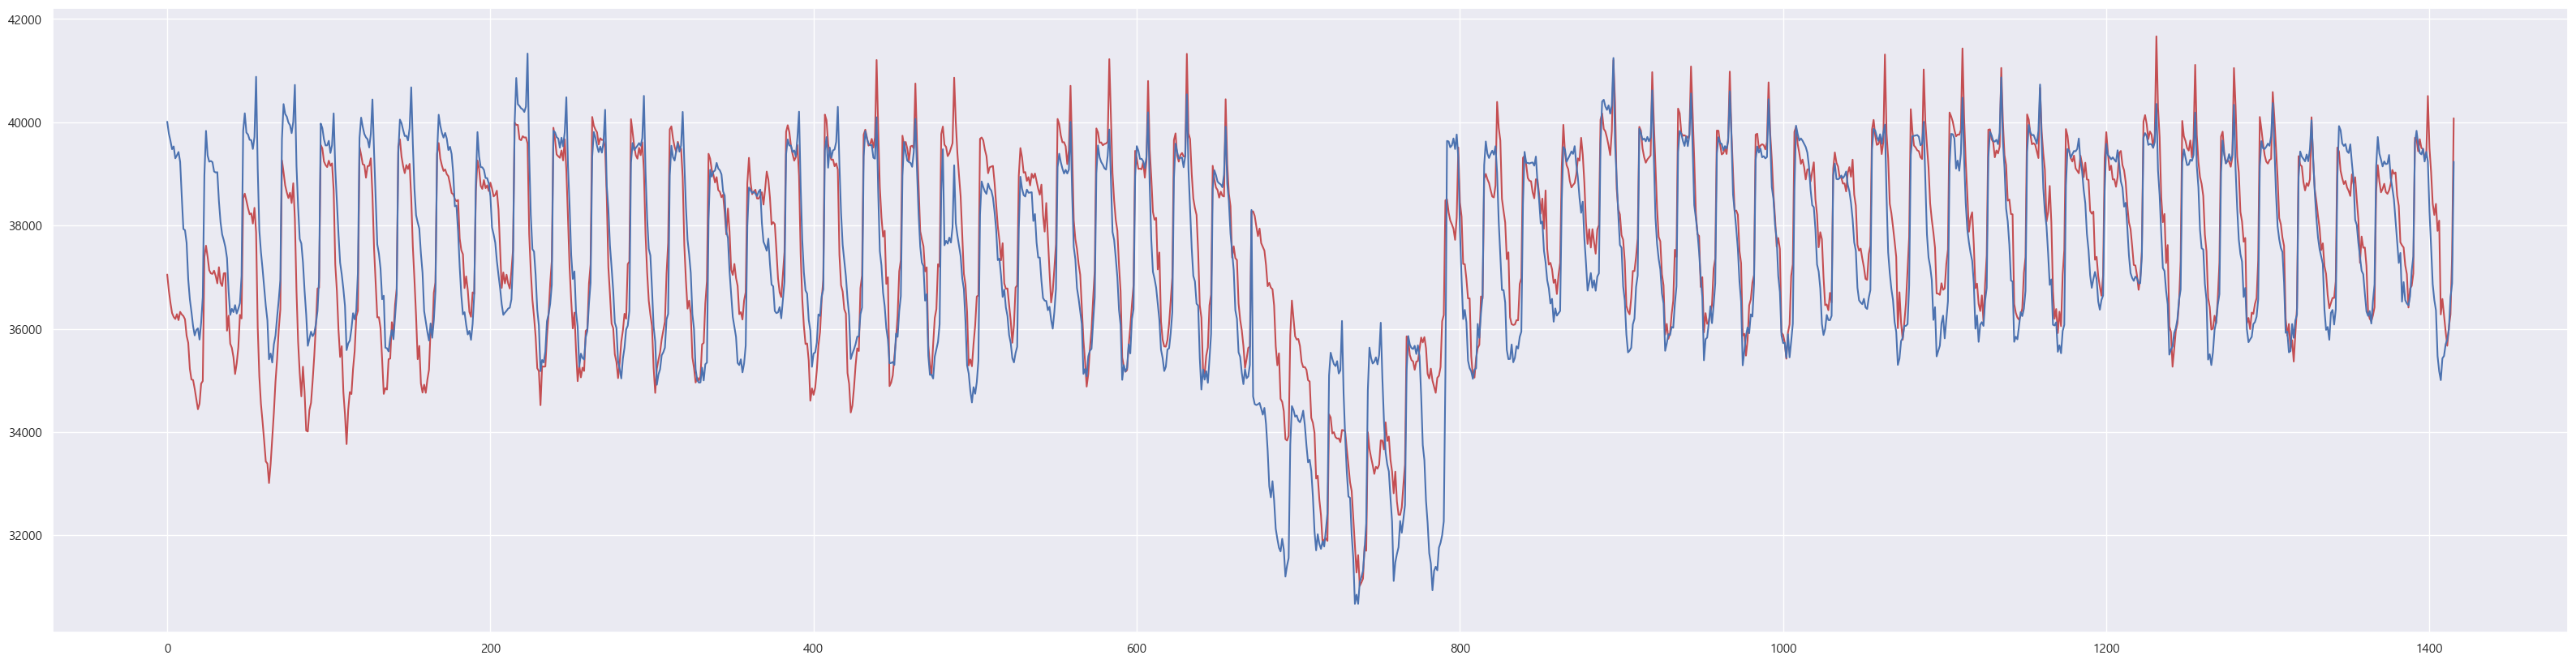

In [13]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_LR)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [14]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [15]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\swjdg\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [16]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(test_x)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))


RandomForestRegressor
Mean Squared Error : 994499.44302
Root Mean Squared Error : 997.24593
r2 :  0.7179513894677058


In [17]:
y_pred_RFR.shape

(1416,)

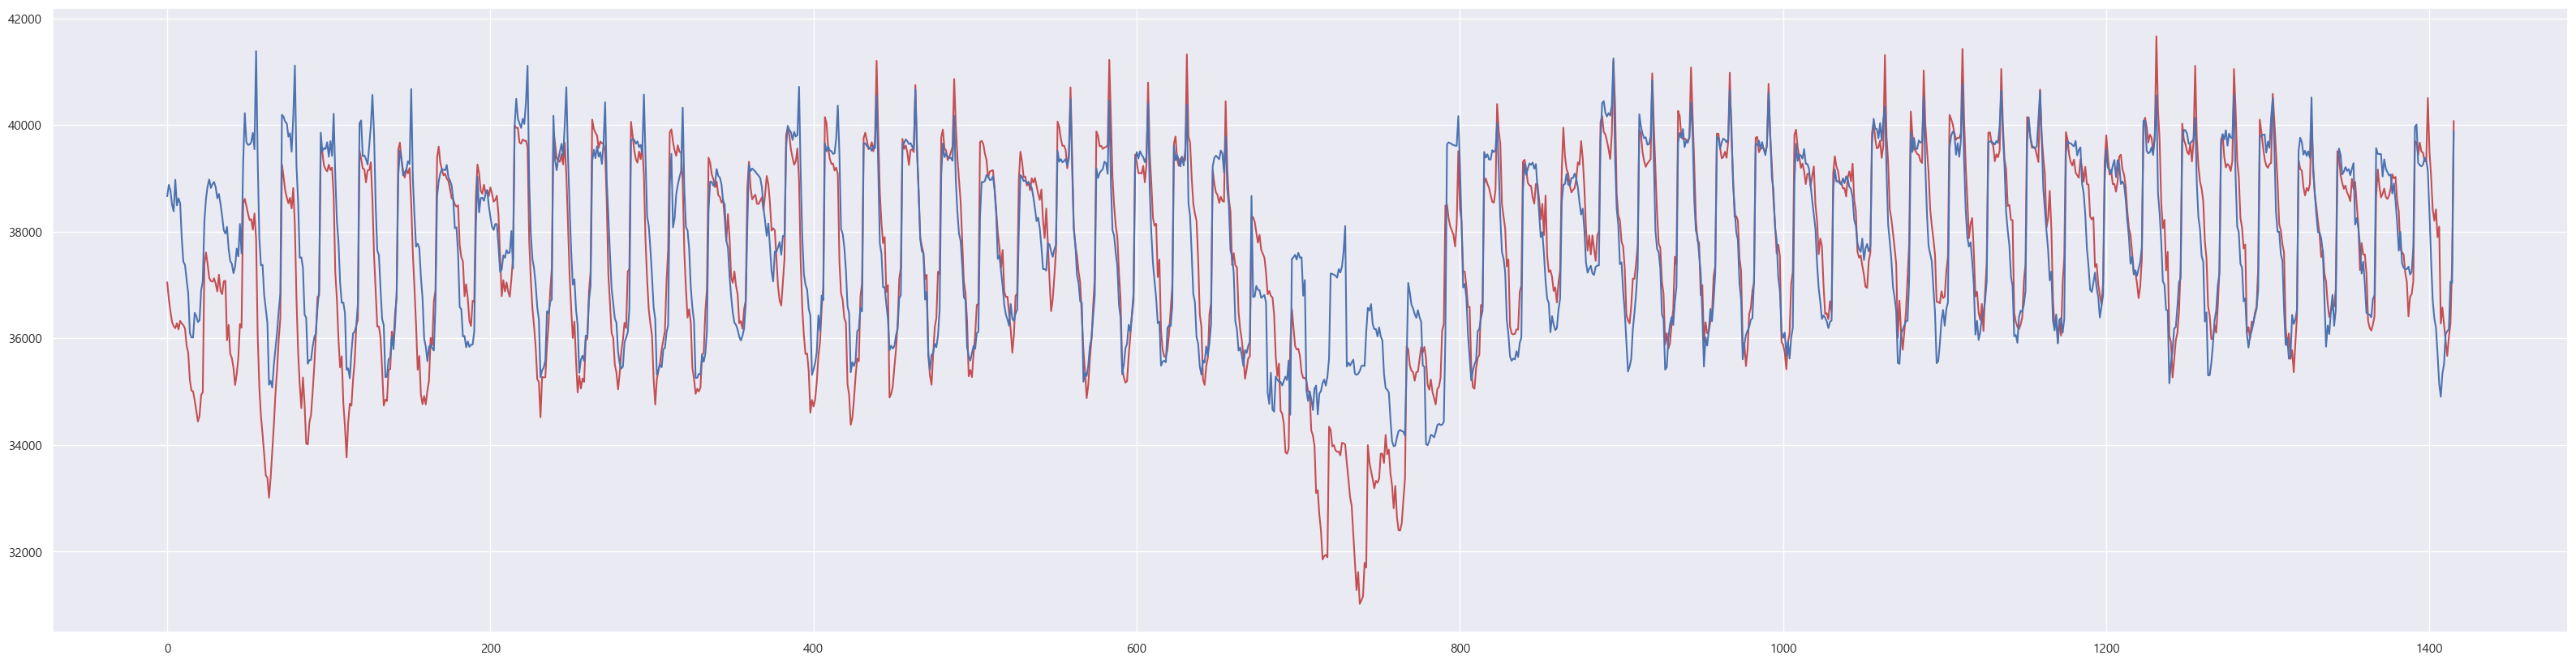

In [18]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [19]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0     0.016316
feature 1     0.006029
feature 2     0.012321
feature 3     0.015999
feature 4     0.007875
feature 5     0.001222
feature 6     0.035581
feature 7     0.820872
feature 8     0.021797
feature 9     0.010509
feature 10    0.011709
feature 11    0.010740
feature 12    0.029030
dtype: float64

In [20]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [21]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)


C:\Users\swjdg\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [22]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(test_x)

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 888010.58093
Root Mean Squared Error : 942.34313
r2 :  0.7481525482502798


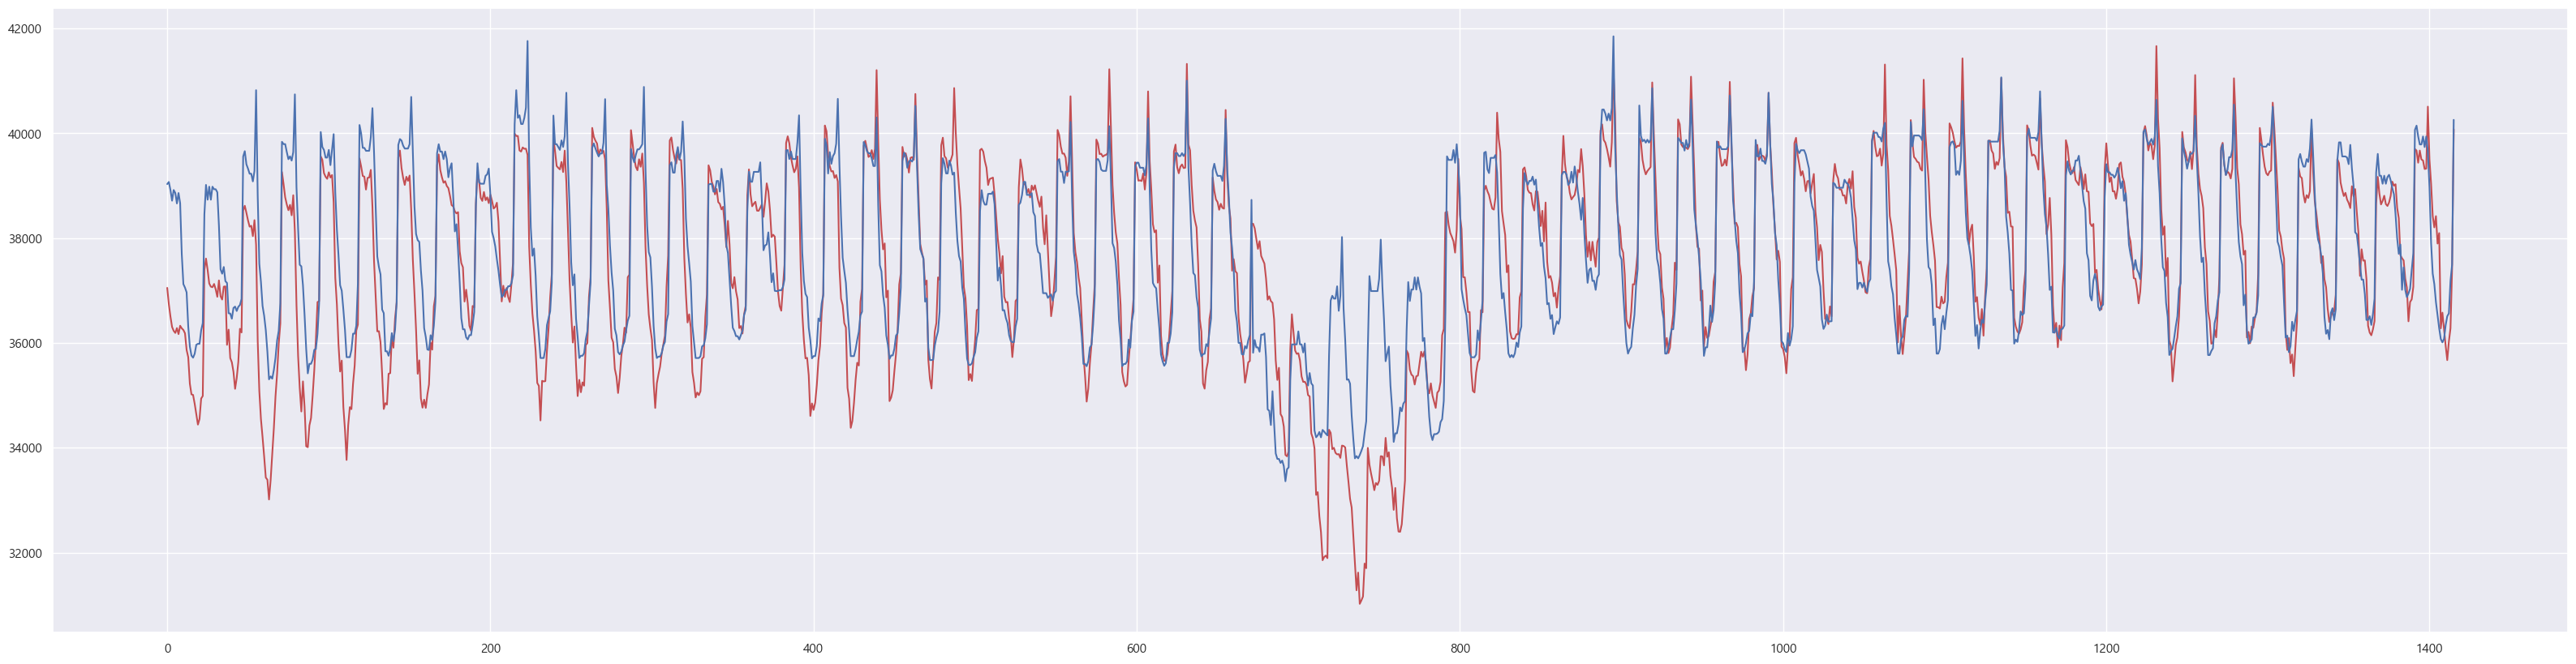

In [23]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [24]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances



feature 0     0.016982
feature 1     0.006673
feature 2     0.008478
feature 3     0.008376
feature 4     0.002552
feature 5     0.001463
feature 6     0.042677
feature 7     0.844771
feature 8     0.004130
feature 9     0.002968
feature 10    0.011955
feature 11    0.016244
feature 12    0.032731
dtype: float64

In [25]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [126]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=12
                              , min_child_weight=1)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

In [141]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 674851.32906
Root Mean Squared Error : 821.49335
r2 :  0.8086063486387075


In [90]:
y_pred_xgb.shape

(1416,)

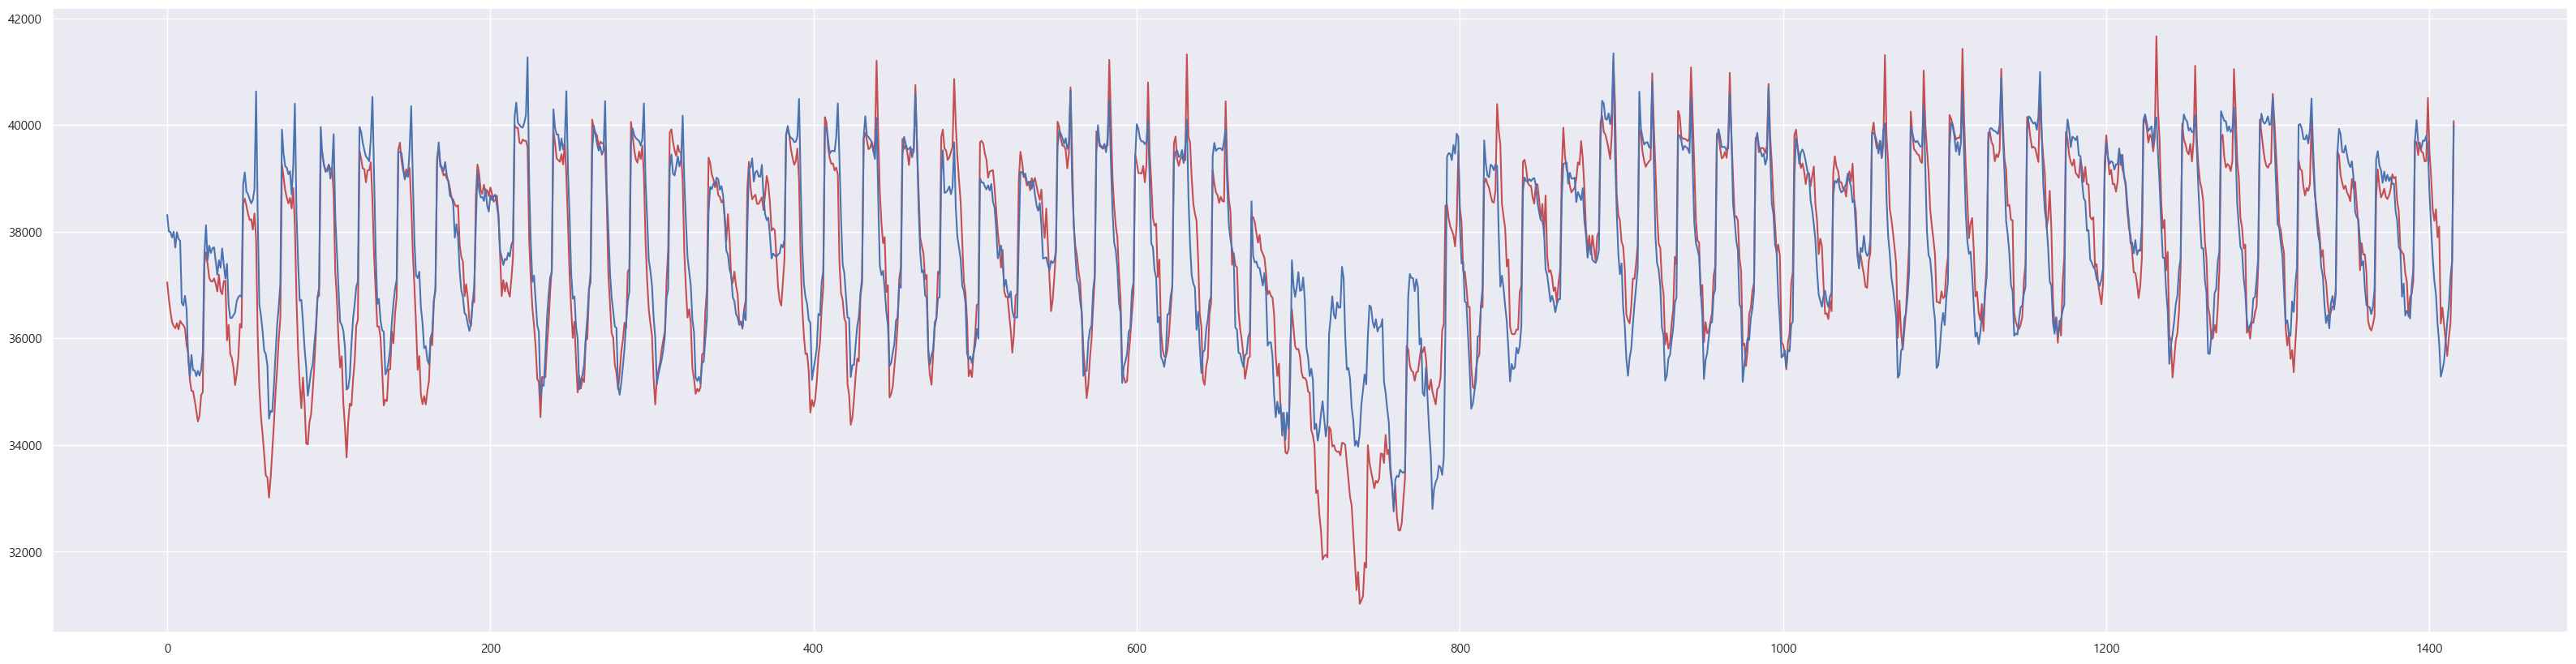

In [91]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

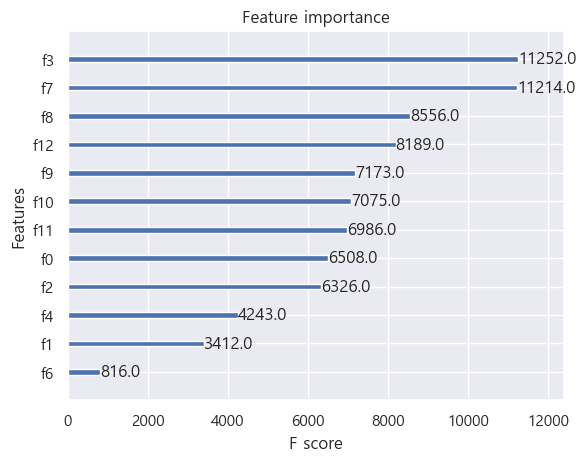

In [30]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)



In [31]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링 test
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [32]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)

In [33]:
scaler.fit(test_x)
scaled_test_x = scaler.transform(test_x)

In [34]:
# 아래에 실습코드를 작성하세요.

scaled_train_x

array([[0.        , 0.        , 0.27272727, ..., 0.5907149 , 0.57706684,
        0.60437964],
       [0.04347826, 0.        , 0.27272727, ..., 0.59959743, 0.60304716,
        0.59835134],
       [0.08695652, 0.        , 0.27272727, ..., 0.59827507, 0.61606152,
        0.59068291],
       ...,
       [0.91304348, 1.        , 1.        , ..., 0.3235518 , 0.31639428,
        0.33217264],
       [0.95652174, 1.        , 1.        , ..., 0.33923859, 0.34518156,
        0.33203847],
       [1.        , 1.        , 1.        , ..., 0.47282973, 0.4769338 ,
        0.42654916]])

In [35]:
LR_reg.fit(scaled_train_x, train_y)
scaled_y_pred_LR = LR_reg.predict(scaled_test_x)

In [36]:
print('scaled_LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_LR))))
print("r2 : ", r2(test_y,scaled_y_pred_LR))

scaled_LinearRegression
Mean Squared Error : 19510099.82585
Root Mean Squared Error : 4417.02387
r2 :  -4.533232407377749


In [37]:
xgb_reg.fit(scaled_train_x, train_y)
scaled_y_pred_xgb = xgb_reg.predict(scaled_test_x)

In [38]:
print('scaled_Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,scaled_y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,scaled_y_pred_xgb))))
print("r2 : ", r2(test_y,scaled_y_pred_xgb))

scaled_Xgboost
Mean Squared Error : 12766573.29998
Root Mean Squared Error : 3573.03419
r2 :  -2.6207101831954294


# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [40]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [41]:
history1 = model1.fit(train_x, train_y, epochs= 10, validation_split=0.2)

Epoch 1/10
1025/1025 [==============================] - 3s 2ms/step - loss: 9263022.0000 - mse: 9263022.0000 - val_loss: 1095170.7500 - val_mse: 1095170.7500
Epoch 2/10
1025/1025 [==============================] - 2s 2ms/step - loss: 2893332.5000 - mse: 2893332.5000 - val_loss: 1272473.2500 - val_mse: 1272473.2500
Epoch 3/10
1025/1025 [==============================] - 2s 2ms/step - loss: 2901665.2500 - mse: 2901665.2500 - val_loss: 1096271.5000 - val_mse: 1096271.5000
Epoch 4/10
1025/1025 [==============================] - 2s 2ms/step - loss: 2857993.0000 - mse: 2857993.0000 - val_loss: 1075862.8750 - val_mse: 1075862.8750
Epoch 5/10
1025/1025 [==============================] - 2s 2ms/step - loss: 2894184.0000 - mse: 2894184.0000 - val_loss: 1049632.2500 - val_mse: 1049632.2500
Epoch 6/10
1025/1025 [==============================] - 2s 2ms/step - loss: 2860927.5000 - mse: 2860927.5000 - val_loss: 1097696.7500 - val_mse: 1097696.7500
Epoch 7/10
1025/1025 [==============================

In [42]:
y_pred_deep1 = model1.predict(test_x)

45/45 [==============================] - 0s 1ms/step


In [43]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))


DEEP1
Mean Squared Error : 1771747.36111
Root Mean Squared Error : 1331.07001
r2 :  0.49751718321829863


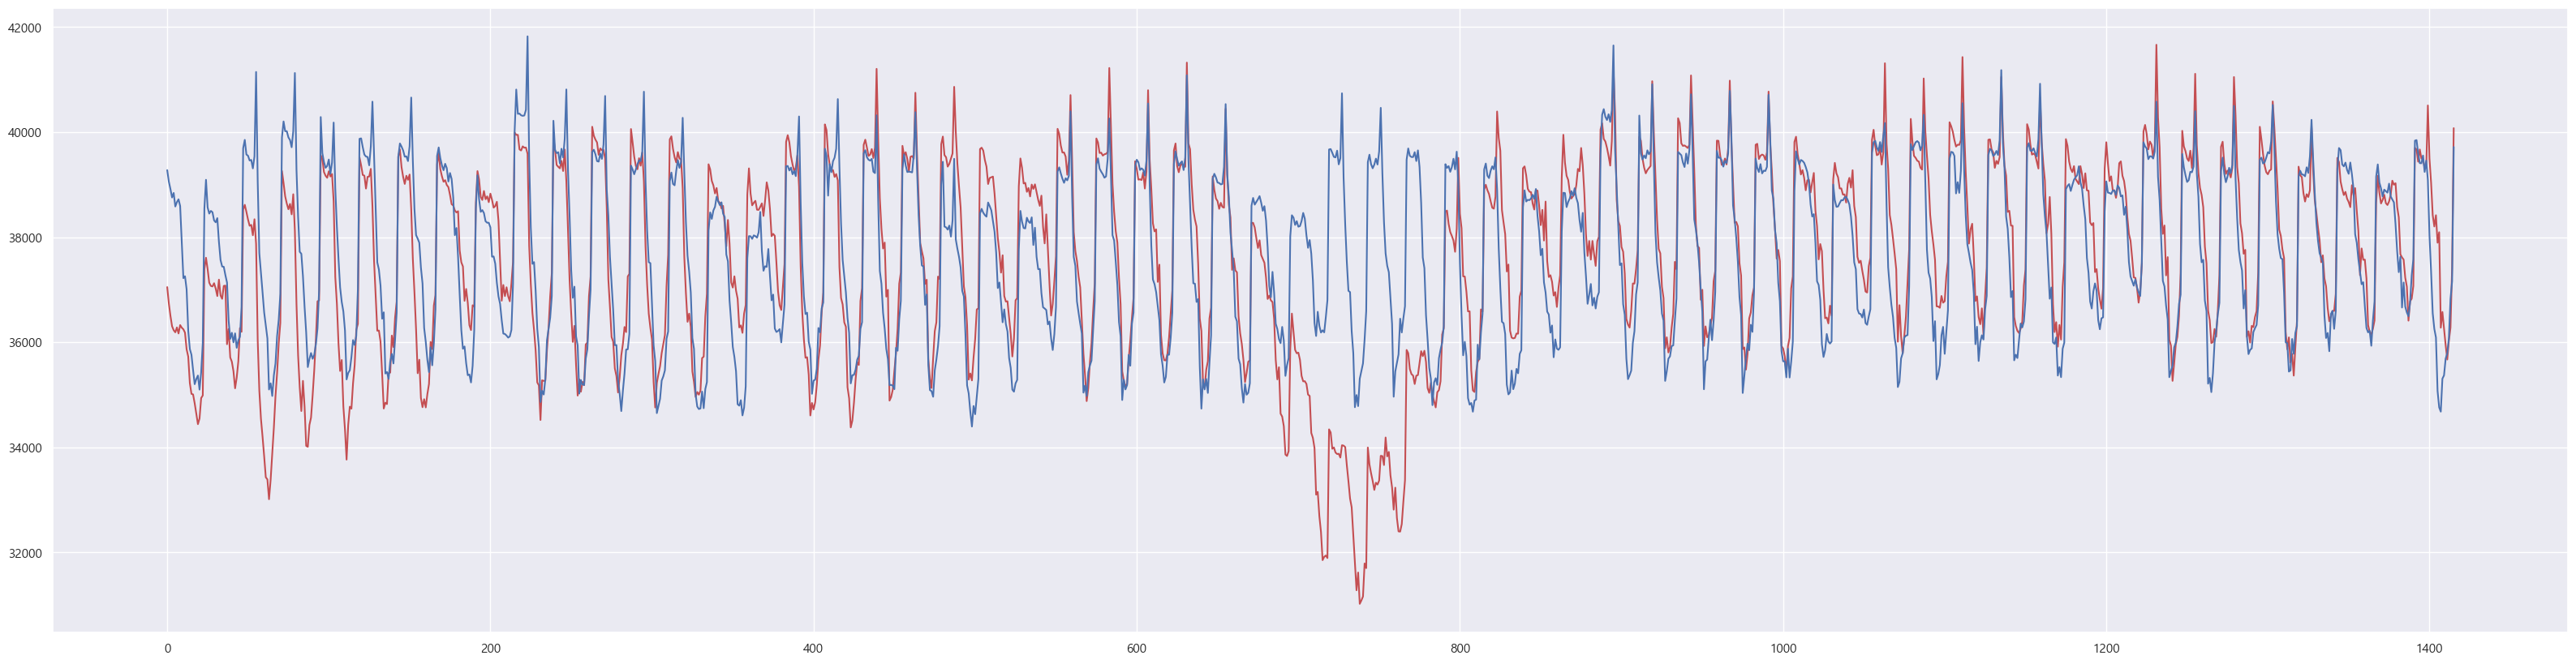

In [44]:

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)


In [128]:
submit = xgb_reg.predict(test_x)


In [129]:
submit = y_pred_xgb

In [130]:
submit

array([38622.996, 38534.996, 38470.49 , ..., 37316.95 , 37410.137,
       40043.78 ], dtype=float32)

In [131]:
submission = pd.DataFrame()

In [132]:
submission = submission.reindex(columns=['id', 'count'])

In [133]:
submission['id'] = np.arange(1416)

In [134]:
submission = submission.reset_index(drop=True)

In [135]:
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
1411,1411,NaN
1412,1412,NaN
1413,1413,NaN
1414,1414,NaN


In [136]:
submission['count'] = submit

In [137]:
submission

,id,count
0,0,38622.996094
1,1,38534.996094
2,2,38470.488281
3,3,38185.949219
4,4,38317.035156
...,...,...
1411,1411,36358.632812
1412,1412,36571.527344
1413,1413,37316.949219
1414,1414,37410.136719


In [138]:
submission.to_csv('C:/Users/swjdg/kt_kaggle/submission.csv', index = False)

In [139]:
a = submission.drop('id',axis=1)